In [2]:
import numpy as np
import os, warnings
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings('ignore')

In [3]:
image_shape = (224, 224)
batch_size = 32
epochs = 10
data_path = r'C:/Users/Ania/Desktop/dataset2/archive (1)/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_folder = os.path.join(data_path, 'train')
valid_folder = os.path.join(data_path, 'valid')

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical', subset='training')
valid_data = train_datagen.flow_from_directory(train_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical', subset='validation')
test_data = test_datagen.flow_from_directory(valid_folder, target_size=image_shape, batch_size=batch_size, class_mode='categorical')

Found 112488 images belonging to 38 classes.
Found 28102 images belonging to 38 classes.
Found 35144 images belonging to 38 classes.


In [7]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model_effnet = Model(inputs=base_model.input, outputs=predictions)
model_effnet.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_effnet.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling (Rescaling)         │ (None, 224, 224, 3)       │               0 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization (Normalization) │ (None, 224, 224, 3)       │               7 │ rescaling[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_1 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             288 │ block1a_se_reduce[0][0]    │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 4,416,329 (16.85 MB)

 Trainable params: 366,246 (1.40 MB)

 Non-trainable params: 4,050,083 (15.45 MB)

In [8]:
#trenowanie
checkpoint = ModelCheckpoint('efficientnetb0_best.keras', save_best_only=True, monitor='val_accuracy', mode='max')
early_stop = EarlyStopping(patience=3, monitor='val_accuracy', restore_best_weights=True)

history_effnet = model_effnet.fit(train_data, validation_data=valid_data, epochs=epochs, callbacks=[checkpoint, early_stop])

Epoch 1/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 5434s 2s/step - accuracy: 0.0300 - loss: 3.6892 - val_accuracy: 0.0246 - val_loss: 3.6918
Epoch 2/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3709s 1s/step - accuracy: 0.0467 - loss: 3.5688 - val_accuracy: 0.0286 - val_loss: 5.4042
Epoch 3/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3611s 1s/step - accuracy: 0.0573 - loss: 3.4407 - val_accuracy: 0.0285 - val_loss: 4.4824
Epoch 4/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3542s 1s/step - accuracy: 0.0668 - loss: 3.4004 - val_accuracy: 0.0629 - val_loss: 3.4687
Epoch 5/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3531s 1s/step - accuracy: 0.0721 - loss: 3.3760 - val_accuracy: 0.0286 - val_loss: 7.0139
Epoch 6/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3528s 1s/step - accuracy: 0.0828 - loss: 3.3356 - val_accuracy: 0.0628 - val_loss: 3.4190
Epoch 7/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3530s 1s/step - accuracy: 0.0970 - loss: 3.2911 - val_accuracy: 0.0489 - val_loss: 7.5740


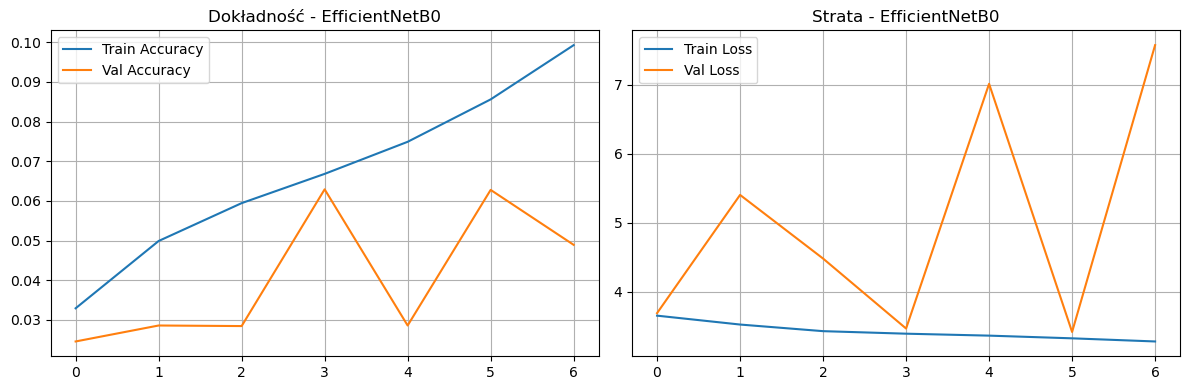

In [12]:
#wykresy uczenia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_effnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_effnet.history['val_accuracy'], label='Val Accuracy')
plt.title('Dokładność - EfficientNetB0')
plt.legend(), plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_effnet.history['loss'], label='Train Loss')
plt.plot(history_effnet.history['val_loss'], label='Val Loss')
plt.title('Strata - EfficientNetB0')
plt.legend(), plt.grid()
plt.tight_layout()
plt.show()

In [14]:
#testowanie
eff_model = tf.keras.models.load_model('efficientnetb0_best.keras')
test_loss, test_acc = eff_model.evaluate(test_data)
print(f'EfficientNetB0 Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}')

1099/1099 ━━━━━━━━━━━━━━━━━━━━ 880s 796ms/step - accuracy: 0.0637 - loss: 3.4698
EfficientNetB0 Test Accuracy: 0.0654, Test Loss: 3.4709


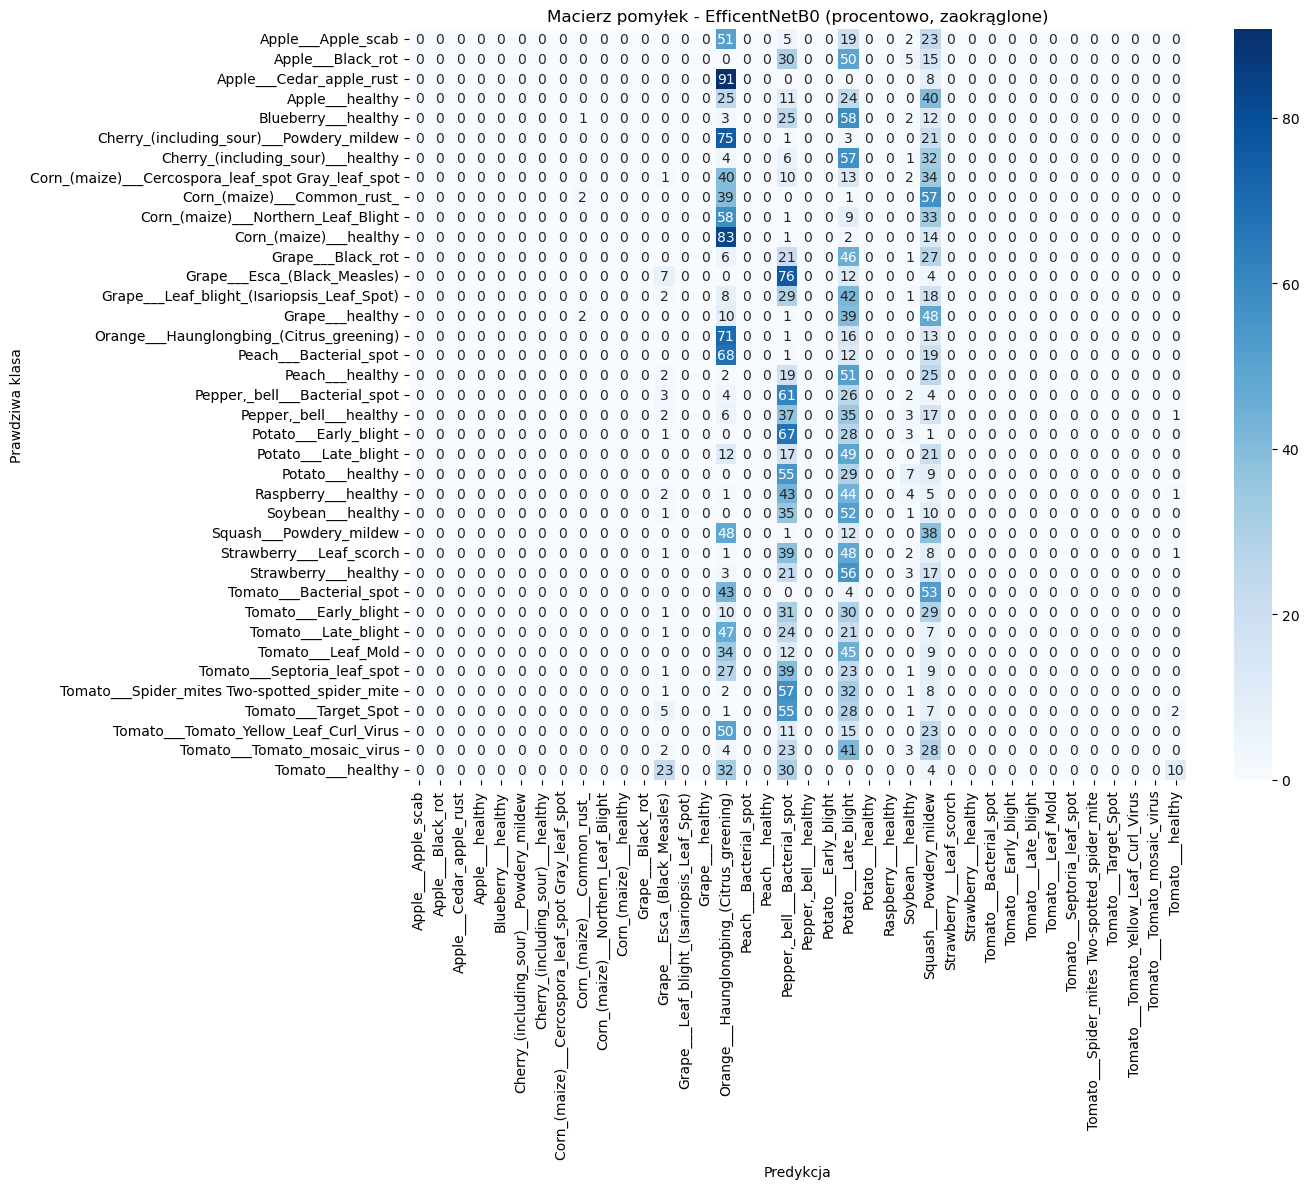

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

model = load_model("efficientnetb0_best.keras")
class_names = list(test_data.class_indices.keys())

#przewidywanie seriami dla każdej klasy
y_true = []
y_pred = []

for i in range(len(test_data)):
    x_batch, y_batch = test_data[i]
    preds = model.predict(x_batch, verbose=0)
    
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

    if (i + 1) * test_data.batch_size >= test_data.samples:
        break

#macierz pomyłek
cm = confusion_matrix(y_true, y_pred)

#normalizowanie w % (zaokrąglonie)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Macierz pomyłek - EfficentNetB0 (procentowo, zaokrąglone)")
plt.xlabel("Predykcja")
plt.ylabel("Prawdziwa klasa")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import os

# ---------- 1. generator z preprocess_input EfficientNet ----------
train_datagen_eff = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
test_datagen_eff  = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data_eff = train_datagen_eff.flow_from_directory(
    train_folder, target_size=(224, 224),
    batch_size=batch_size, class_mode='categorical',
    subset='training'
)
valid_data_eff = train_datagen_eff.flow_from_directory(
    train_folder, target_size=(224, 224),
    batch_size=batch_size, class_mode='categorical',
    subset='validation'
)

# ---------- 2. wczytaj najlepszy checkpoint ----------
model_eff = load_model('efficientnetb0_best.keras')

# ---------- 3. odblokuj ostatnie 20 warstw ----------
for layer in model_eff.layers[-20:]:
    layer.trainable = True

# ---------- 4. kompilacja z małym learning-rate ----------
model_eff.compile(
    optimizer=Adam(1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ---------- 5. szybki fine-tuning 5 epok ----------
early  = EarlyStopping(monitor='val_accuracy', patience=2, restore_best_weights=True)
reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=1, min_lr=1e-6)

history_eff_fine = model_eff.fit(
    train_data_eff,
    validation_data=valid_data_eff,
    epochs=5,
    callbacks=[early, reduce]
)

# zapisz dogrzany model
model_eff.save('efficientnetb0_finetuned.keras')
print("✔️  Dogrzany model zapisany jako efficientnetb0_finetuned.keras")


Found 112488 images belonging to 38 classes.
Found 28102 images belonging to 38 classes.
Epoch 1/5
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 5007s 1s/step - accuracy: 0.6558 - loss: 1.3587 - val_accuracy: 0.9707 - val_loss: 0.0943 - learning_rate: 1.0000e-04
Epoch 2/5
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4830s 1s/step - accuracy: 0.9551 - loss: 0.1472 - val_accuracy: 0.9814 - val_loss: 0.0550 - learning_rate: 1.0000e-04
Epoch 3/5
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4844s 1s/step - accuracy: 0.9736 - loss: 0.0817 - val_accuracy: 0.9859 - val_loss: 0.0441 - learning_rate: 1.0000e-04
Epoch 4/5
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4837s 1s/step - accuracy: 0.9809 - loss: 0.0576 - val_accuracy: 0.9886 - val_loss: 0.0372 - learning_rate: 1.0000e-04
Epoch 5/5
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4846s 1s/step - accuracy: 0.9859 - loss: 0.0429 - val_accuracy: 0.9898 - val_loss: 0.0288 - learning_rate: 1.0000e-04
✔️  Dogrzany model zapisany jako efficientnetb0_finetuned.keras


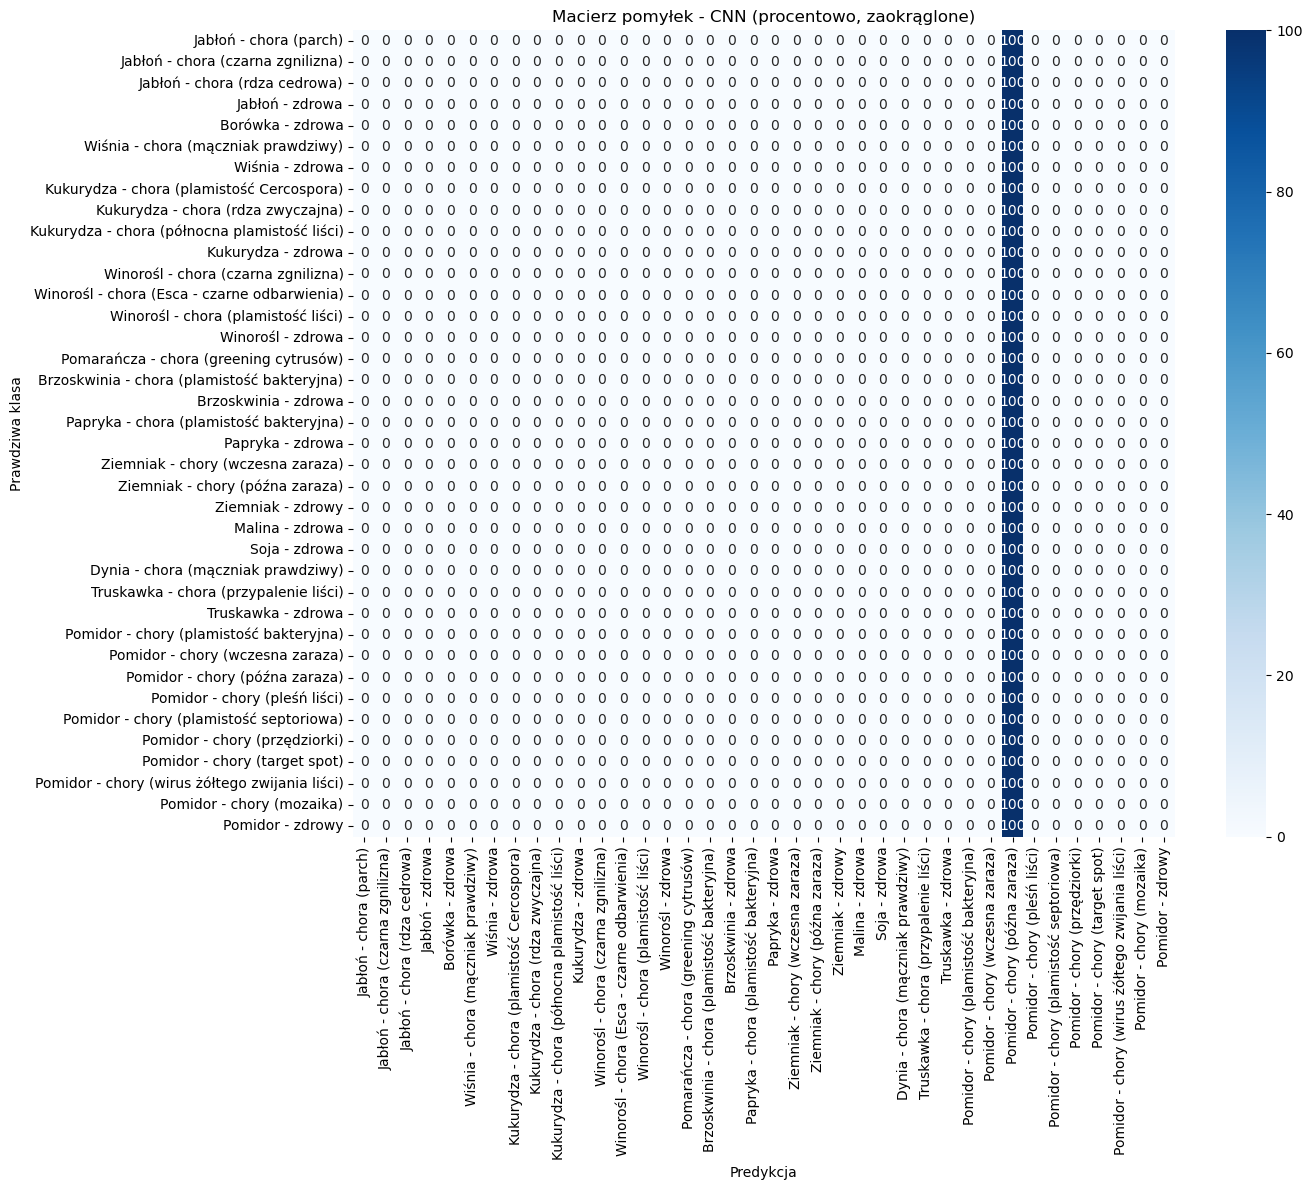

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Załaduj model
model = load_model("efficientnetb0_finetuned.keras")

# Klasy
class_names = [
    'Jabłoń - chora (parch)', 'Jabłoń - chora (czarna zgnilizna)', 'Jabłoń - chora (rdza cedrowa)', 'Jabłoń - zdrowa',
    'Borówka - zdrowa', 'Wiśnia - chora (mączniak prawdziwy)', 'Wiśnia - zdrowa',
    'Kukurydza - chora (plamistość Cercospora)', 'Kukurydza - chora (rdza zwyczajna)',
    'Kukurydza - chora (północna plamistość liści)', 'Kukurydza - zdrowa',
    'Winorośl - chora (czarna zgnilizna)', 'Winorośl - chora (Esca - czarne odbarwienia)',
    'Winorośl - chora (plamistość liści)', 'Winorośl - zdrowa',
    'Pomarańcza - chora (greening cytrusów)', 'Brzoskwinia - chora (plamistość bakteryjna)',
    'Brzoskwinia - zdrowa', 'Papryka - chora (plamistość bakteryjna)', 'Papryka - zdrowa',
    'Ziemniak - chory (wczesna zaraza)', 'Ziemniak - chory (późna zaraza)', 'Ziemniak - zdrowy',
    'Malina - zdrowa', 'Soja - zdrowa', 'Dynia - chora (mączniak prawdziwy)',
    'Truskawka - chora (przypalenie liści)', 'Truskawka - zdrowa',
    'Pomidor - chory (plamistość bakteryjna)', 'Pomidor - chory (wczesna zaraza)', 'Pomidor - chory (późna zaraza)',
    'Pomidor - chory (pleśń liści)', 'Pomidor - chory (plamistość septoriowa)',
    'Pomidor - chory (przędziorki)', 'Pomidor - chory (target spot)',
    'Pomidor - chory (wirus żółtego zwijania liści)', 'Pomidor - chory (mozaika)', 'Pomidor - zdrowy'
]

# Przewidywanie batchami
y_true = []
y_pred = []

for i in range(len(test_data)):
    x_batch, y_batch = test_data[i]
    preds = model.predict(x_batch, verbose=0)
    
    y_true.extend(np.argmax(y_batch, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

    if (i + 1) * test_data.batch_size >= test_data.samples:
        break

# Macierz pomyłek
cm = confusion_matrix(y_true, y_pred)

# Normalizowana w % (zaokrąglona)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Wizualizacja
plt.figure(figsize=(14, 12))
sns.heatmap(cm_normalized, annot=True, fmt='.0f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Macierz pomyłek - CNN (procentowo, zaokrąglone)")
plt.xlabel("Predykcja")
plt.ylabel("Prawdziwa klasa")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

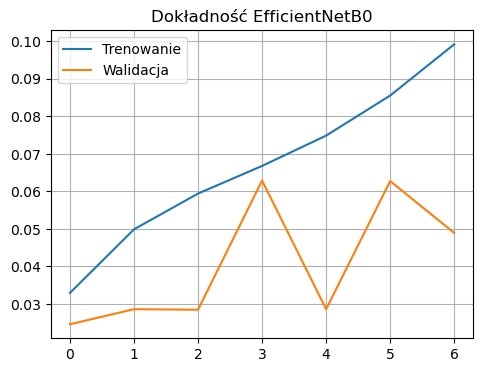

In [28]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_effnet.history['accuracy'], label='Trenowanie')
plt.plot(history_effnet.history['val_accuracy'], label='Walidacja')
plt.title('Dokładność EfficientNetB0')
plt.legend(), plt.grid()

plt.show()